In [34]:
# load the pt-pt json file into a dataframe
import pandas as pd
import os 

df = pd.DataFrame()

for json_file in os.listdir('dataset/jsonl'):
    df = pd.concat([df, pd.read_json('dataset/jsonl/' + json_file, lines=True)], ignore_index=True)
    print(f"Added {json_file} to dataframe")

Added af-ZA.jsonl to dataframe
Added am-ET.jsonl to dataframe
Added ar-SA.jsonl to dataframe
Added az-AZ.jsonl to dataframe
Added bn-BD.jsonl to dataframe
Added cy-GB.jsonl to dataframe
Added da-DK.jsonl to dataframe
Added de-DE.jsonl to dataframe
Added el-GR.jsonl to dataframe
Added en-US.jsonl to dataframe
Added es-ES.jsonl to dataframe
Added fa-IR.jsonl to dataframe
Added fi-FI.jsonl to dataframe
Added fr-FR.jsonl to dataframe
Added he-IL.jsonl to dataframe
Added hi-IN.jsonl to dataframe
Added hu-HU.jsonl to dataframe
Added hy-AM.jsonl to dataframe
Added id-ID.jsonl to dataframe
Added is-IS.jsonl to dataframe
Added it-IT.jsonl to dataframe
Added ja-JP.jsonl to dataframe
Added jv-ID.jsonl to dataframe
Added ka-GE.jsonl to dataframe
Added km-KH.jsonl to dataframe
Added kn-IN.jsonl to dataframe
Added ko-KR.jsonl to dataframe
Added lv-LV.jsonl to dataframe
Added ml-IN.jsonl to dataframe
Added mn-MN.jsonl to dataframe
Added ms-MY.jsonl to dataframe
Added my-MM.jsonl to dataframe
Added nb

In [35]:
%run -i "preprocess_lang.ipynb"
%run -i "preprocess_nolang.ipynb"
%run -i "evaluation.ipynb"

In [36]:
df["locale"] = df["locale"].apply(lambda x: x.split("-")[0])
df, encoder = encode_labels(df)

In [37]:
df.head()

,id,locale,partition,scenario,intent,utt,annot_utt,worker_id,slot_method,judgments
0,0,af,test,alarm,2,maak my wakker om vyf v. m. die week,maak my wakker om [time : vyf v. m.] [date : d...,37,"[{'slot': 'time', 'method': 'localization'}, {...","[{'worker_id': '20', 'intent_score': 1, 'slots..."
1,1,af,train,alarm,2,maak my wakker nege-uur v. m. op vrydag,maak my wakker [time : nege-uur v. m.] op [dat...,20,"[{'slot': 'time', 'method': 'translation'}, {'...","[{'worker_id': '40', 'intent_score': 1, 'slots..."
2,2,af,train,alarm,2,stel 'n alarm vir twee ure van nou af,stel 'n alarm vir [time : twee ure van nou af],20,"[{'slot': 'time', 'method': 'translation'}]","[{'worker_id': '64', 'intent_score': 1, 'slots..."
3,3,af,test,audio,4,stil,stil,40,[],"[{'worker_id': '45', 'intent_score': 1, 'slots..."
4,4,af,train,audio,4,janneman stilte,janneman stilte,40,[],"[{'worker_id': '45', 'intent_score': 1, 'slots..."


calendar          118500
play              101200
qa                 84250
email              69050
iot                55350
general            48150
weather            42750
transport          40250
lists              39650
news               35450
recommendation     29800
datetime           28900
social             28250
alarm              27500
music              23450
audio              19350
takeaway           17900
cooking            16300
Name: scenario, dtype: int64
calendar          0.143454
play              0.122511
qa                0.101991
email             0.083591
iot               0.067006
general           0.058289
weather           0.051752
transport         0.048726
lists             0.048000
news              0.042915
recommendation    0.036075
datetime          0.034986
social            0.034199
alarm             0.033291
music             0.028388
audio             0.023425
takeaway          0.021669
cooking           0.019732
Name: scenario, dtype: float64


<AxesSubplot: >

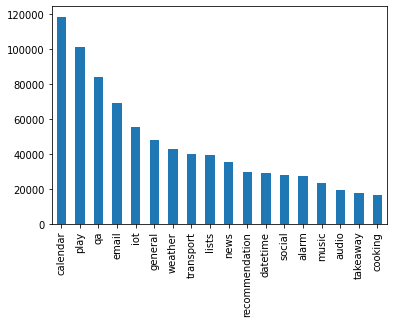

In [38]:
print(df['scenario'].value_counts())

print(df['scenario'].value_counts(normalize=True))

df['scenario'].value_counts().plot(kind='bar')

af    16521
ru    16521
lv    16521
ml    16521
mn    16521
ms    16521
my    16521
nb    16521
nl    16521
pl    16521
pt    16521
ro    16521
sl    16521
am    16521
sq    16521
sv    16521
sw    16521
ta    16521
te    16521
th    16521
tl    16521
tr    16521
ur    16521
vi    16521
ko    16521
kn    16521
km    16521
ka    16521
ar    16521
az    16521
bn    16521
cy    16521
da    16521
de    16521
el    16521
en    16521
es    16521
fa    16521
fi    16521
fr    16521
he    16521
hi    16521
hu    16521
hy    16521
id    16521
is    16521
it    16521
ja    16521
jv    16521
zh    16521
Name: locale, dtype: int64
af    0.02
ru    0.02
lv    0.02
ml    0.02
mn    0.02
ms    0.02
my    0.02
nb    0.02
nl    0.02
pl    0.02
pt    0.02
ro    0.02
sl    0.02
am    0.02
sq    0.02
sv    0.02
sw    0.02
ta    0.02
te    0.02
th    0.02
tl    0.02
tr    0.02
ur    0.02
vi    0.02
ko    0.02
kn    0.02
km    0.02
ka    0.02
ar    0.02
az    0.02
bn    0.02
cy    0.02
da    0.02
de    0.02

<AxesSubplot: >

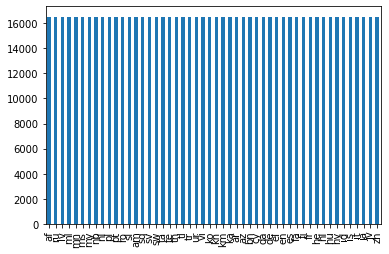

In [39]:
print(df['locale'].value_counts())

print(df['locale'].value_counts(normalize=True))

df['locale'].value_counts().plot(kind='bar')

<AxesSubplot: >

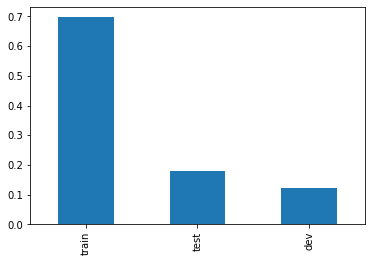

In [40]:
# plot the distribution of partitions with the percentage of each partition
df['partition'].value_counts(normalize=True).plot(kind='bar')

In [41]:
training_df = df[df['partition'] != 'test']
testing_df = df[(df['partition'] == 'test')]

In [42]:
training_df.reset_index(drop=True, inplace=True)
testing_df.reset_index(drop=True, inplace=True)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer()
vectorizer.fit(training_df['utt'].values)

CountVectorizer()

In [44]:
input_cols = [f'__{feature_name}' for feature_name in vectorizer.get_feature_names_out()]
output_cols = ['intent']

training_inputs = vectorizer.transform(training_df['utt'].values)
testing_inputs = vectorizer.transform(testing_df['utt'].values)
training_classes = training_df[output_cols].values.reshape(-1)
testing_classes = testing_df[output_cols].values.reshape(-1)

In [46]:
indices = {}

for lang in testing_df['locale'].unique():
    indices[lang] = testing_df.index[(testing_df['locale'] == lang)].values

In [47]:
print(vectorizer.get_feature_names_out())

['a5' 'aa' 'aabot' ... '힘들었어' '힙합' '２つめのポッドキャストを再生して']


In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier

clf = MultinomialNB()
clf.fit(training_inputs, training_classes)

MultinomialNB()

Evaluation metrics for MultinomialNB
MultinomialNB's default score metric: 0.6374646940147949
Classification report
              precision    recall  f1-score   support

           0     0.9233    0.4818    0.6332      1700
           1     0.9853    0.3190    0.4820      1050
           2     0.6571    0.5478    0.5975      2050
           3     0.9622    0.3236    0.4844       550
           4     0.9174    0.3400    0.4961      1600
           5     1.0000    0.0033    0.0066       300
           6     0.4146    0.4108    0.4127       650
           7     0.4516    0.6162    0.5212      6300
           8     0.7687    0.6884    0.7263      3350
           9     0.3593    0.9381    0.5195     10450
          11     0.9239    0.5433    0.6843      3600
          12     0.9739    0.1493    0.2590       750
          13     0.7501    0.7402    0.7451      4400
          14     0.6847    0.1267    0.2138       600
          15     0.7580    0.8519    0.8022      5950
          16     0.

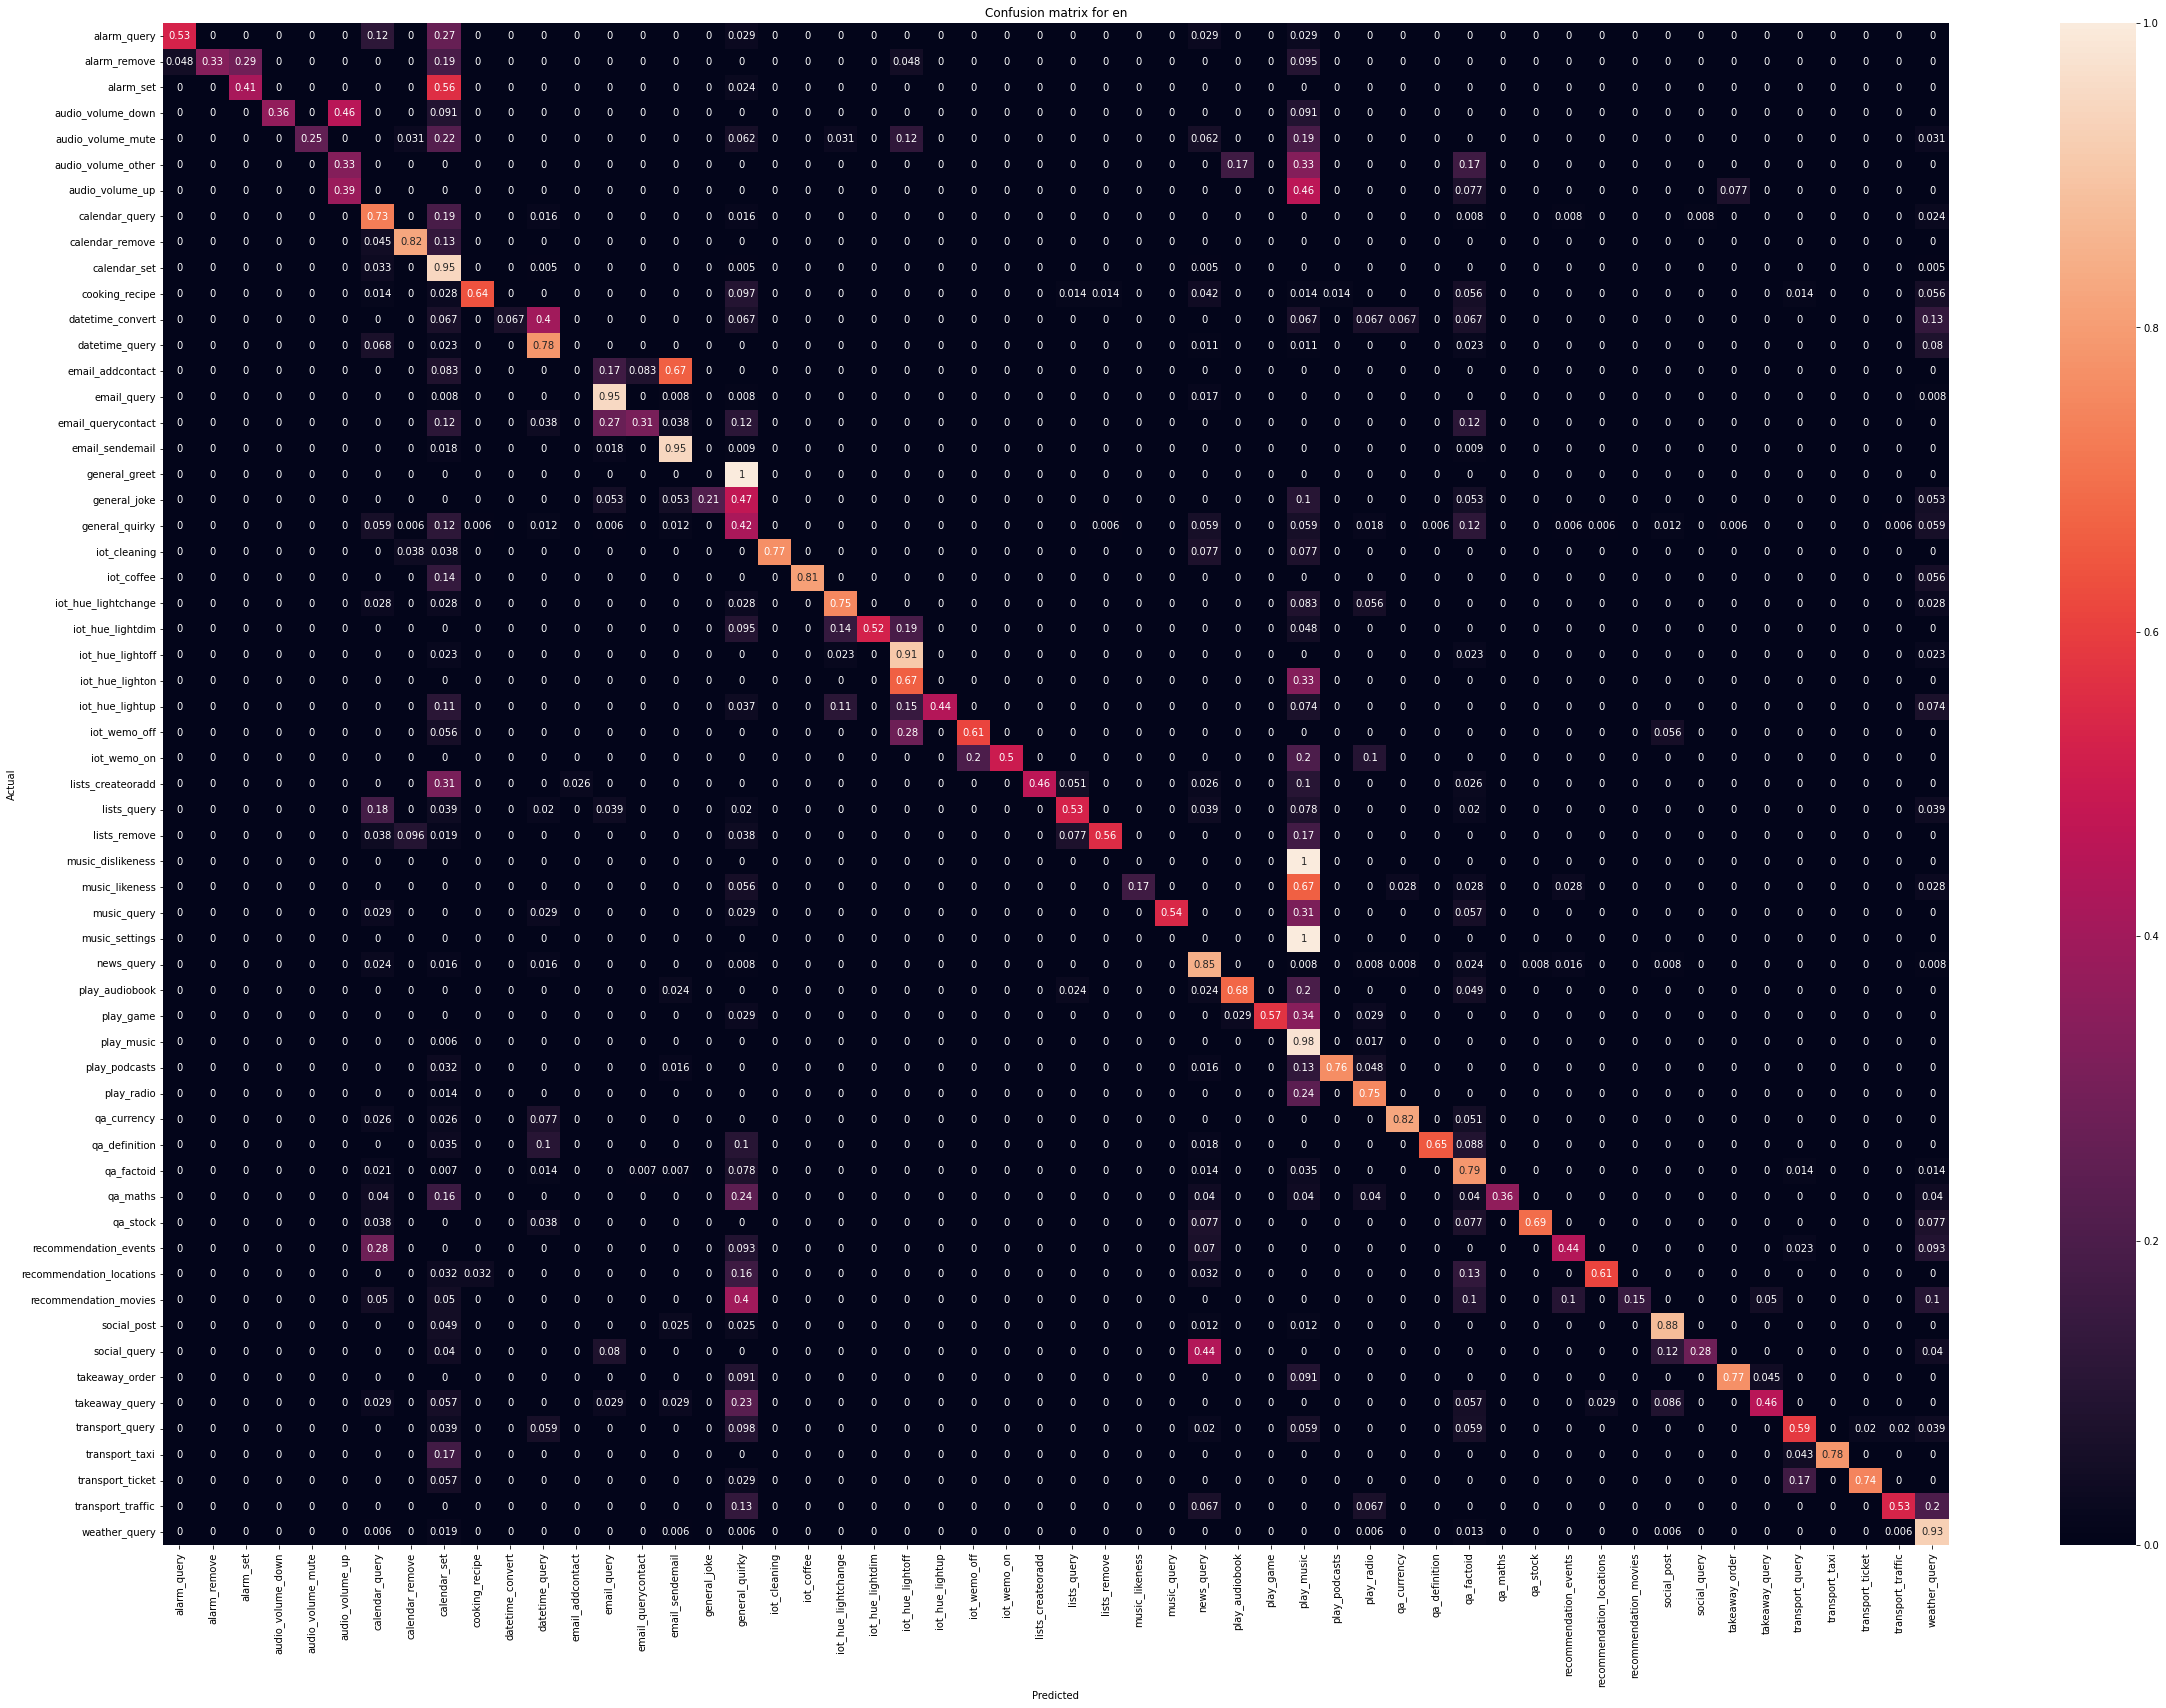

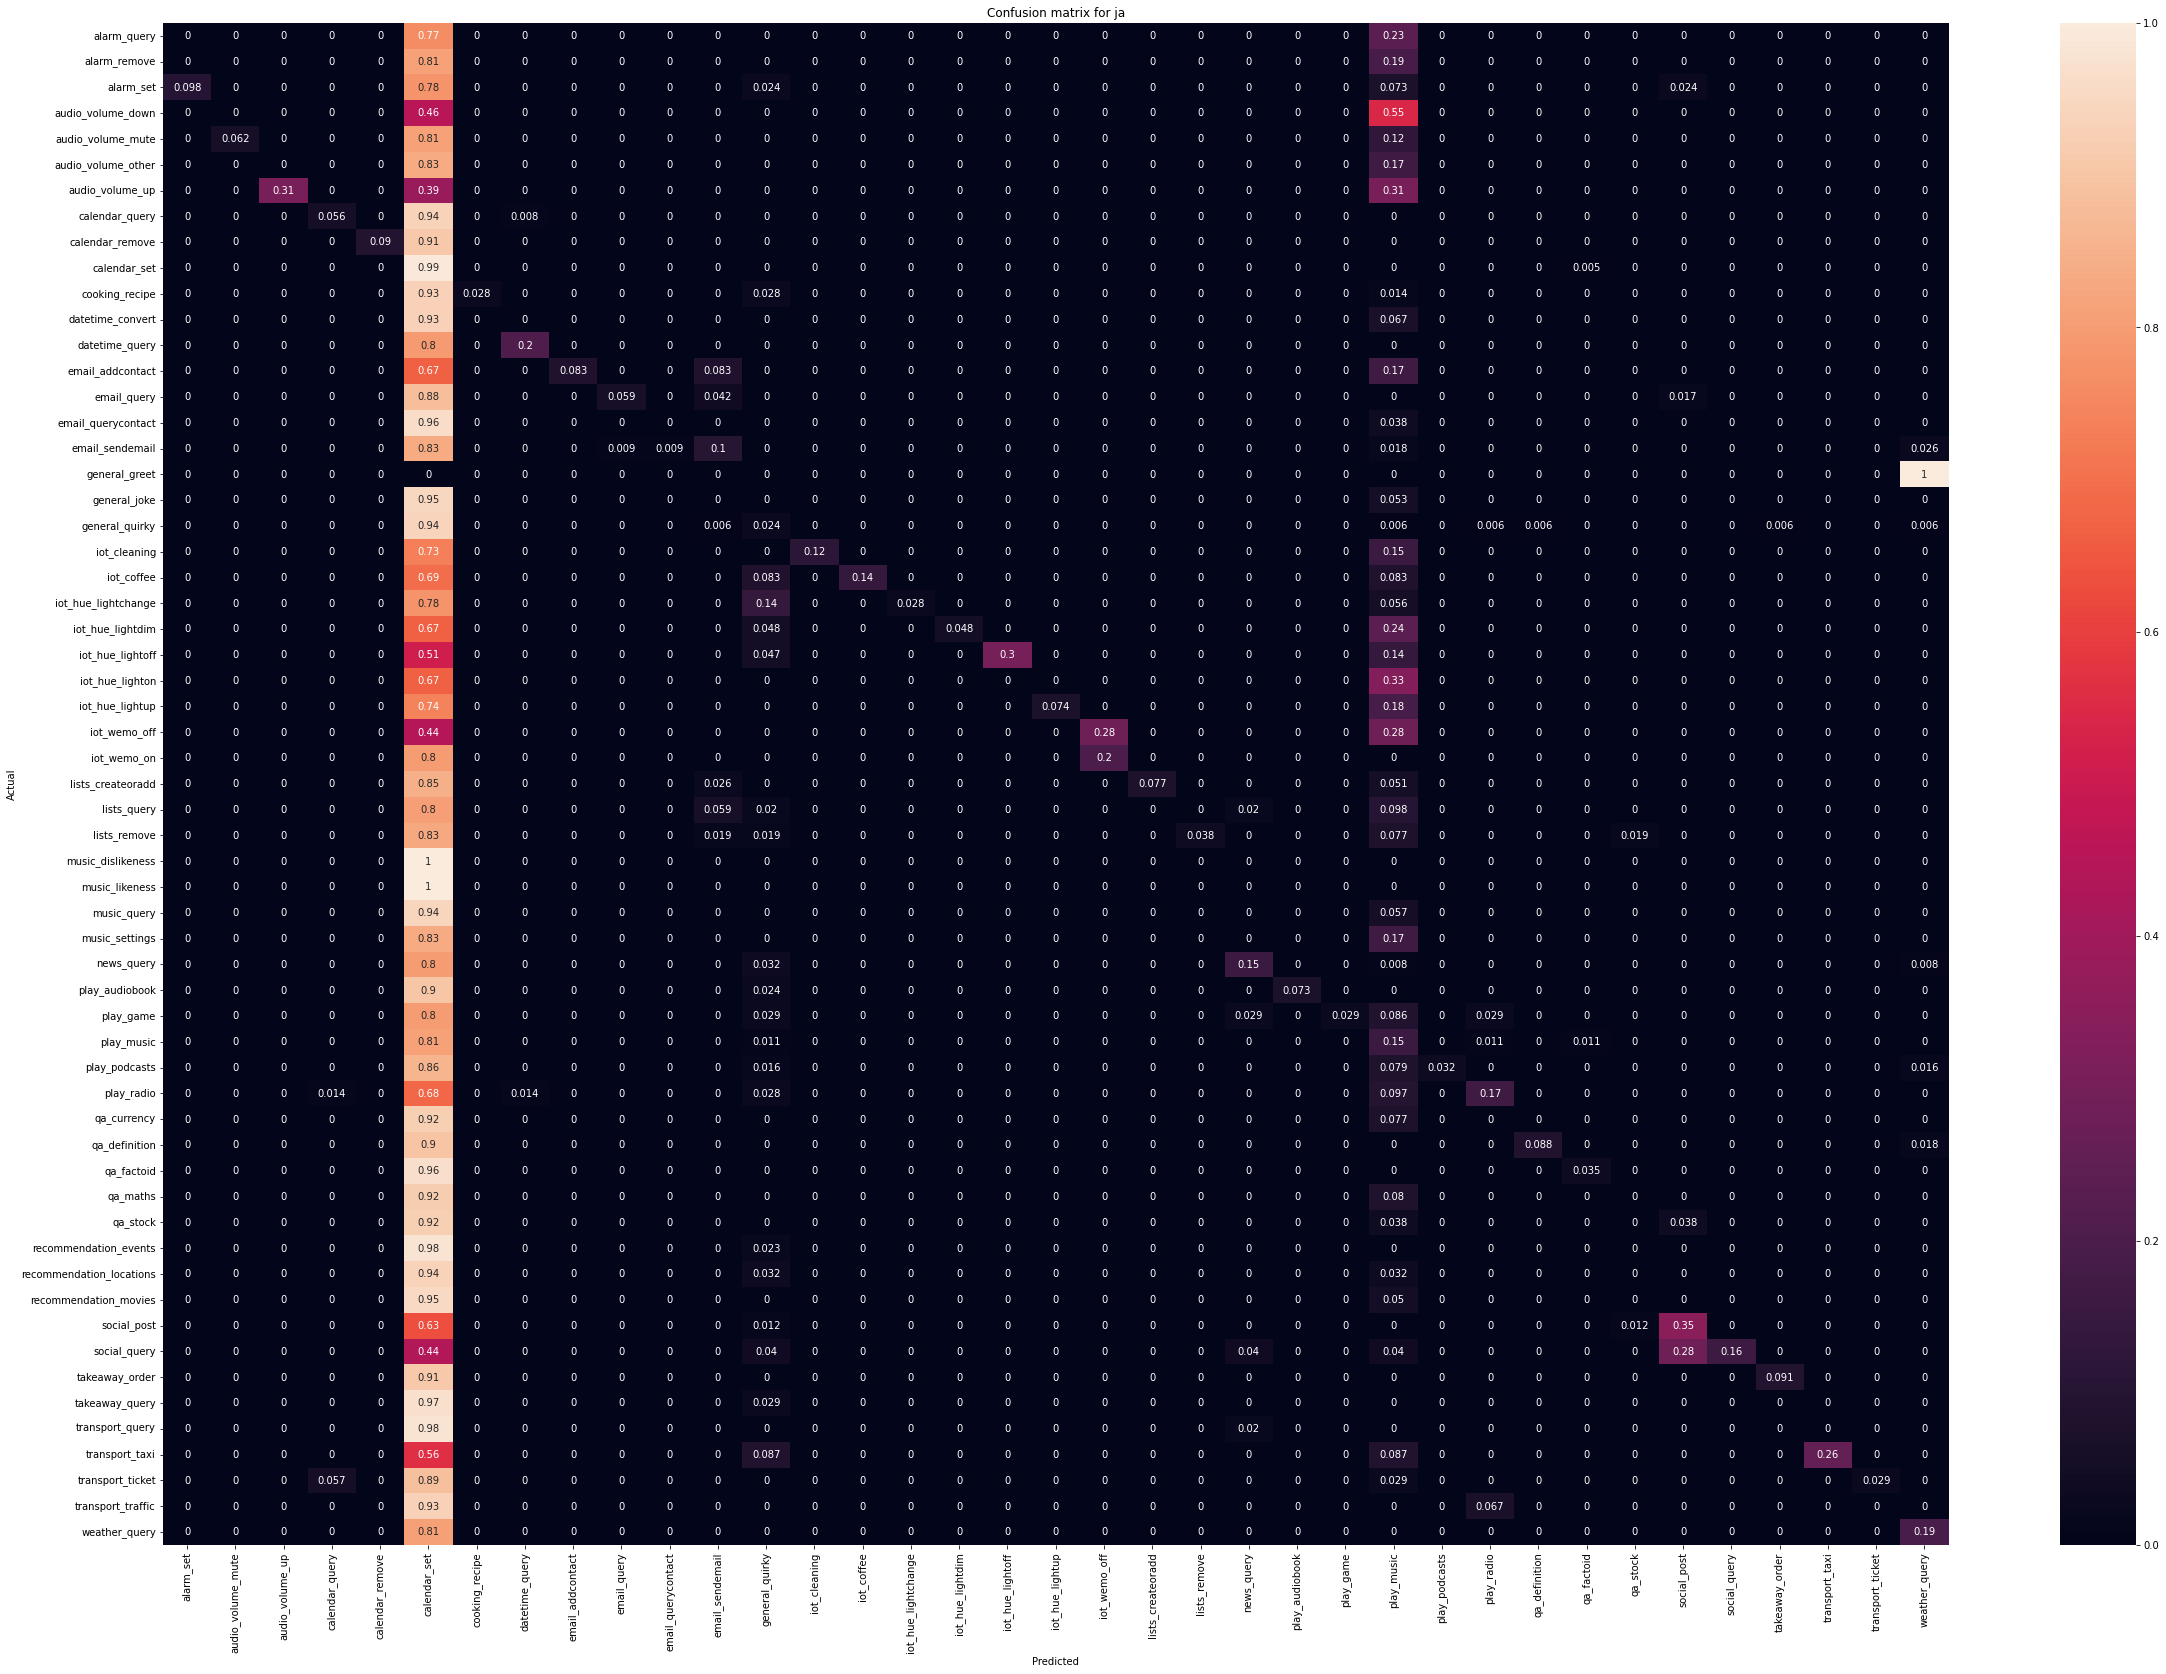

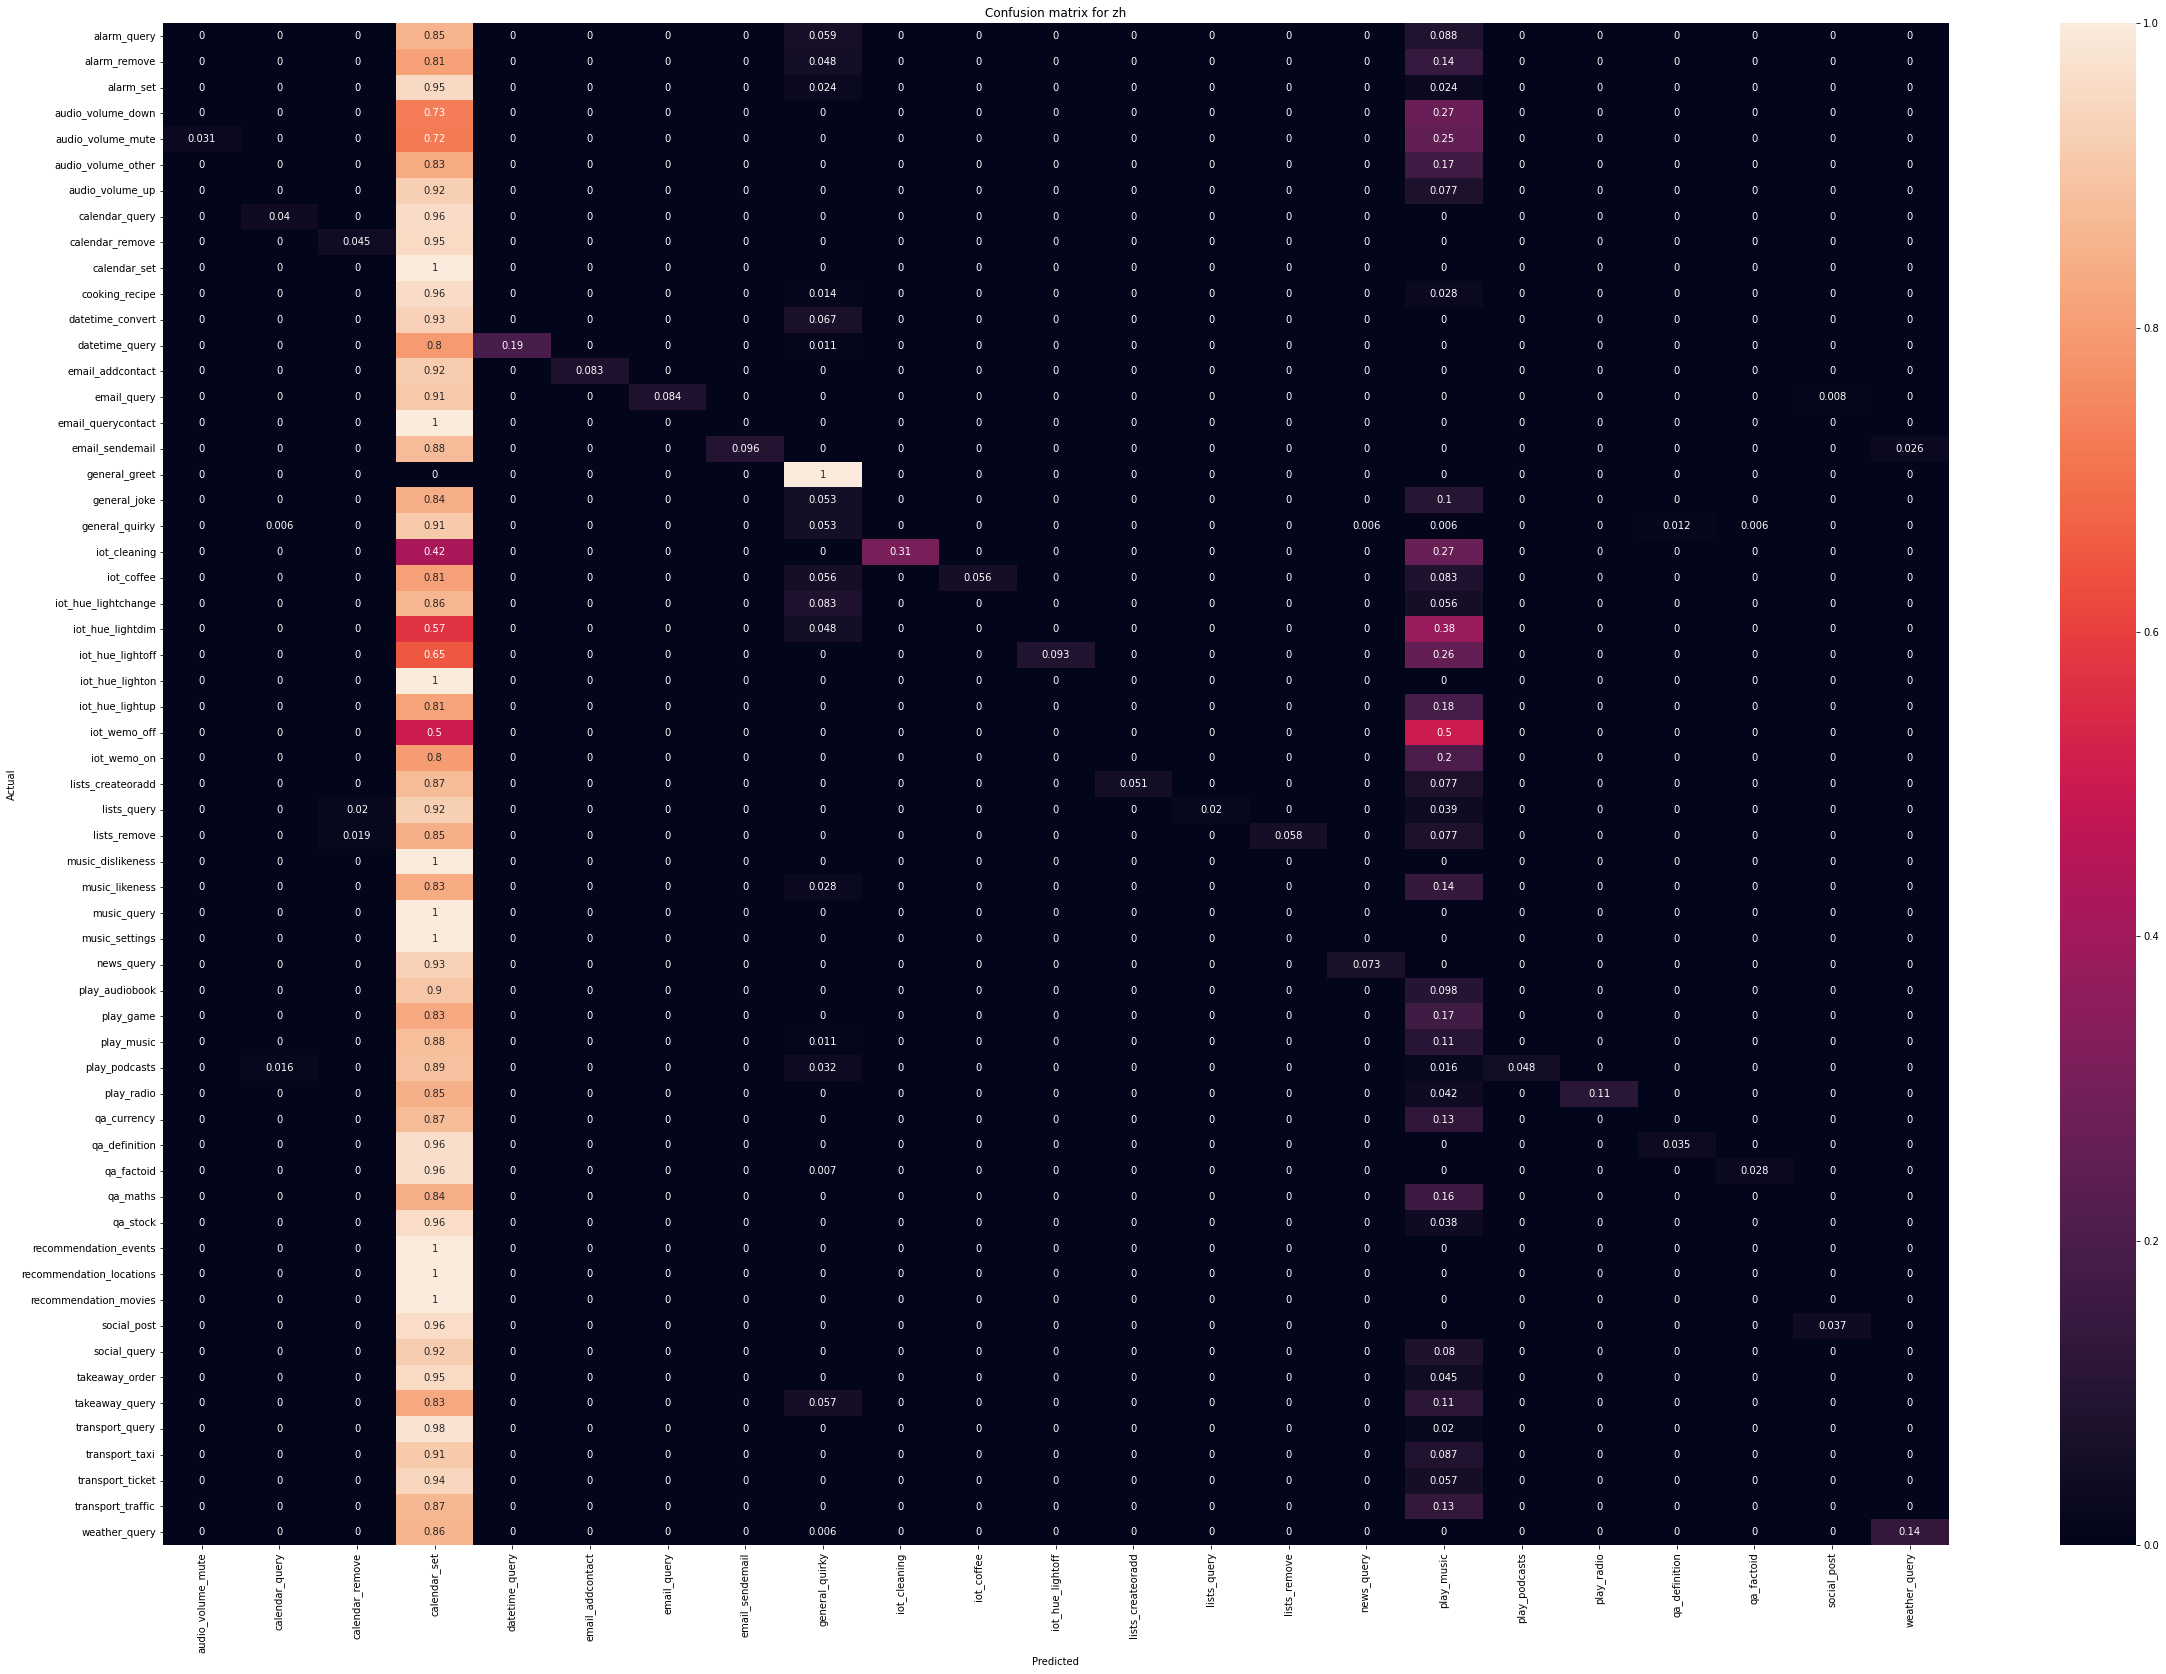

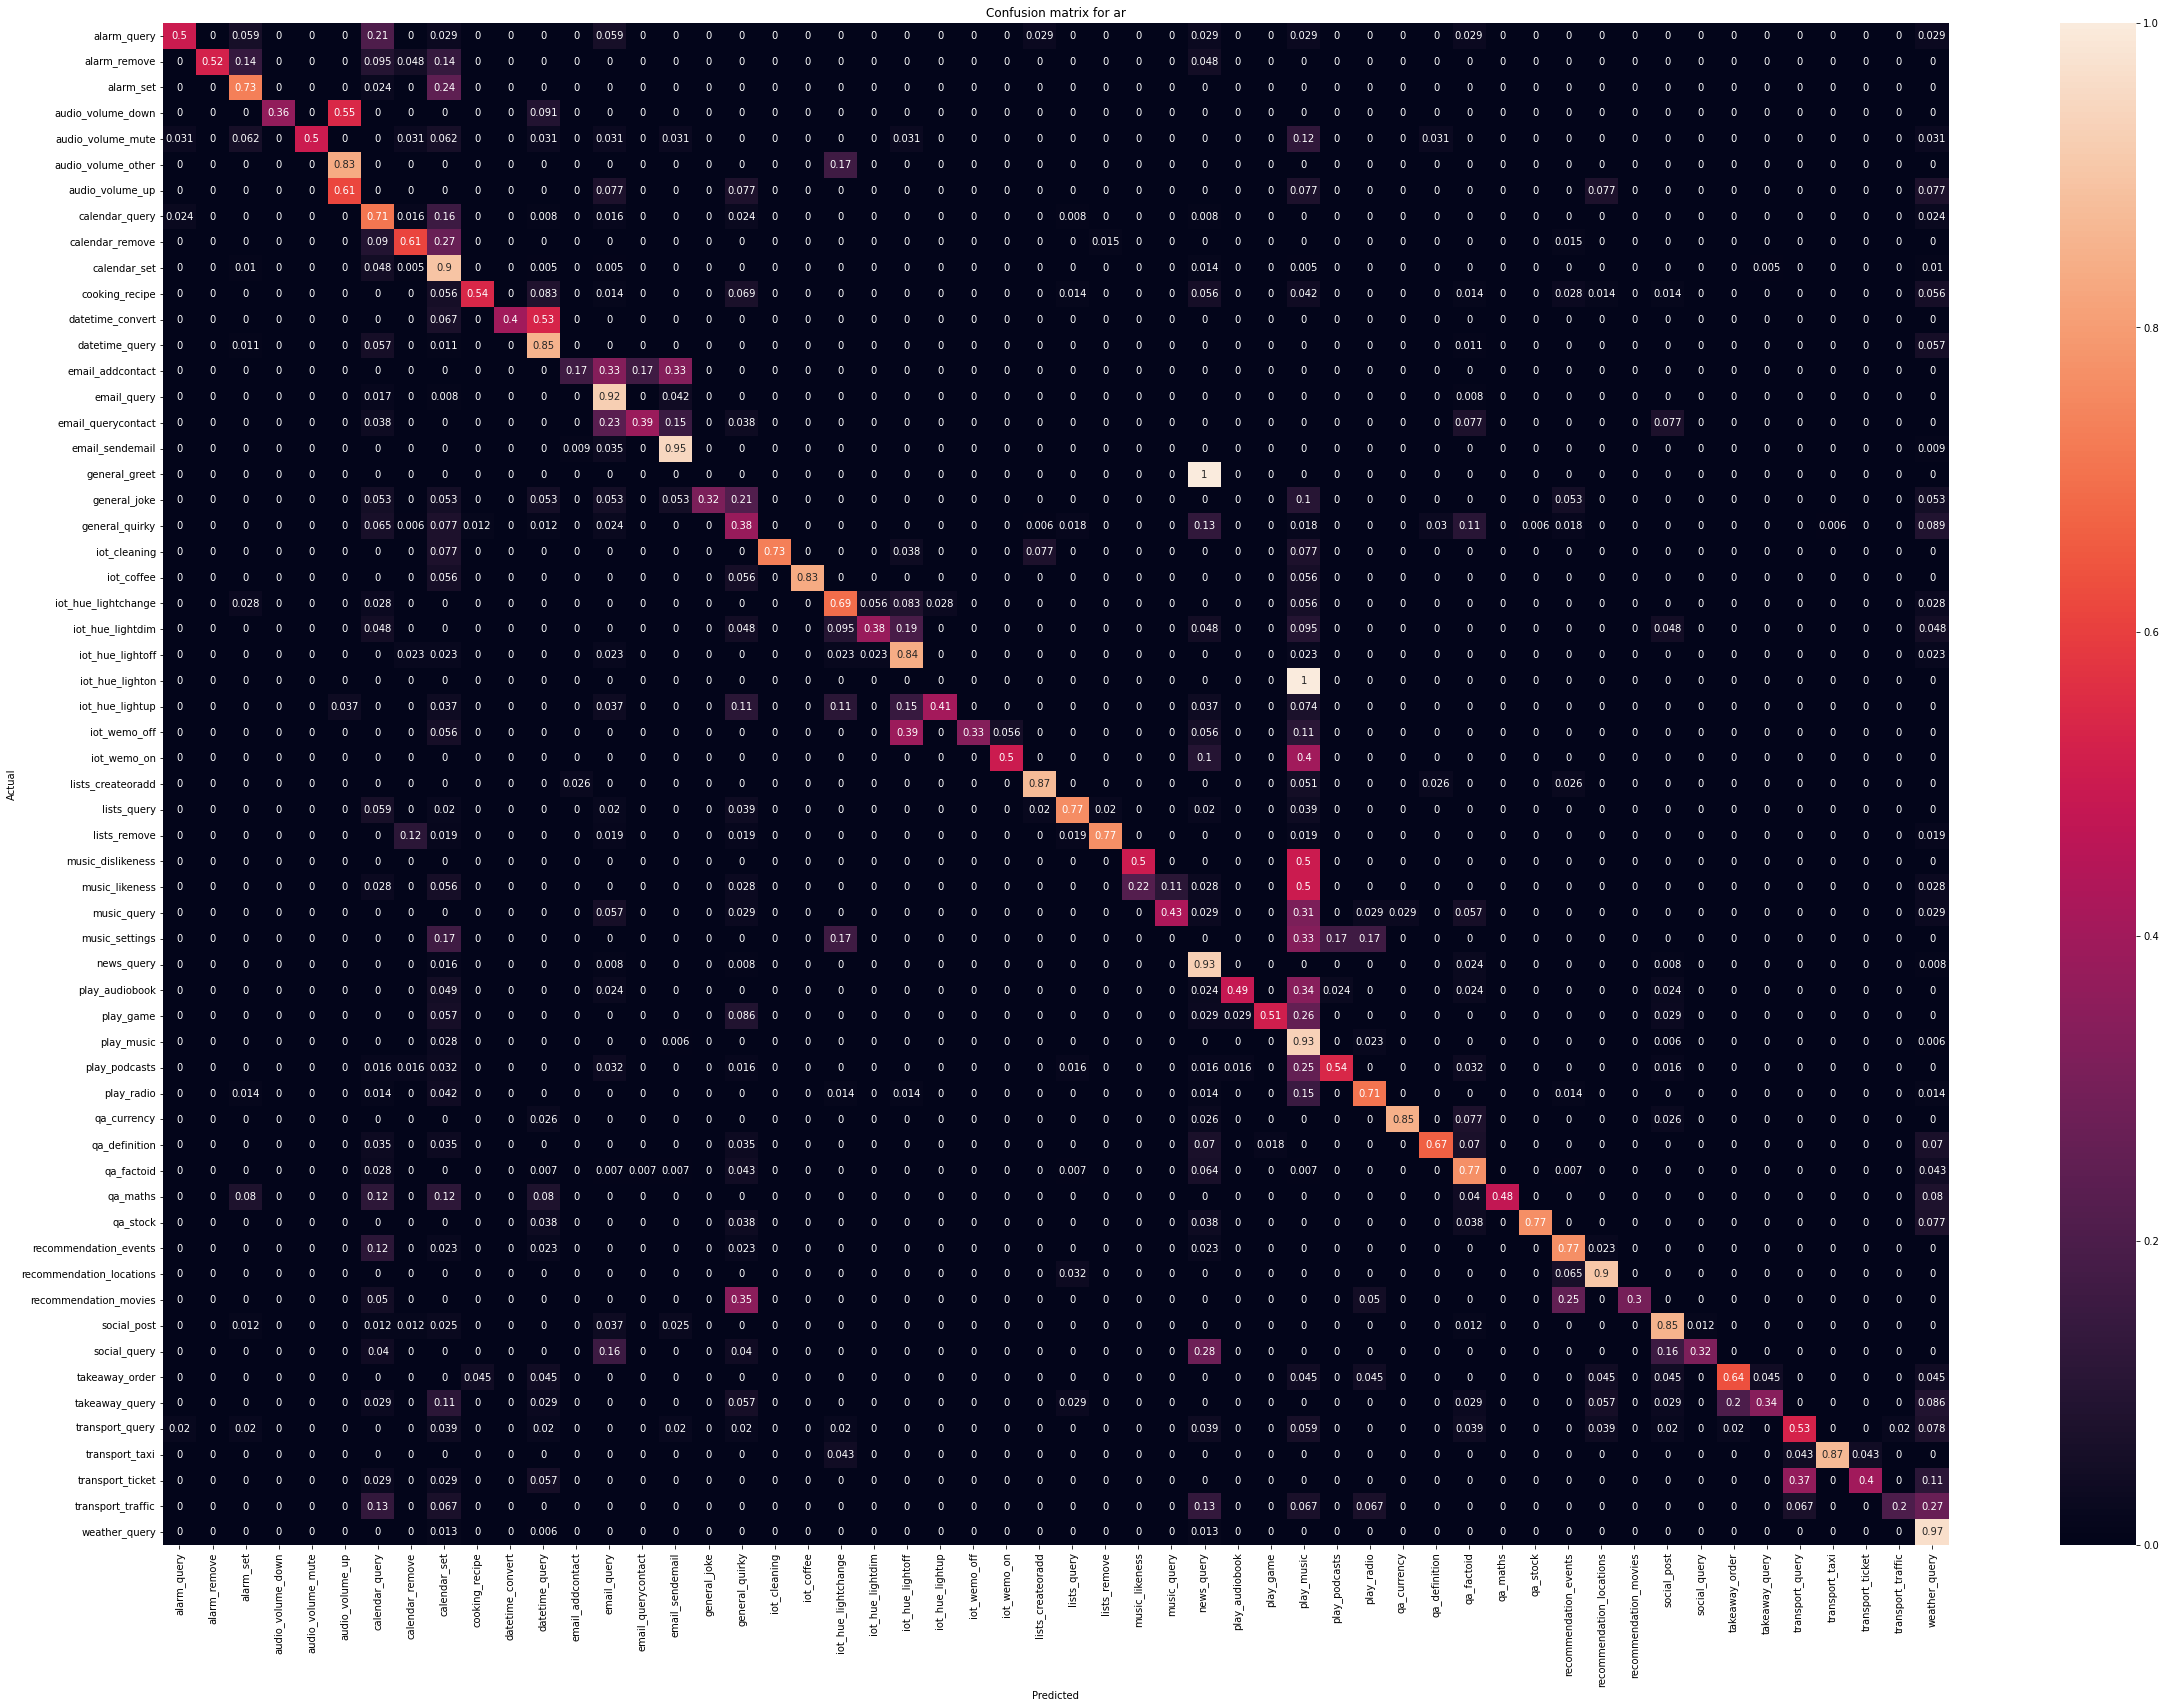

In [49]:
evaluate_model(clf, testing_inputs, testing_classes, encoder, indices)